<a href="https://colab.research.google.com/github/Sowjanya-Madasu/CODSOFT/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        4 non-null      object
 1   Genre        4 non-null      object
 2   Description  4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes
None
Title          0
Genre          0
Description    0
dtype: int64
2    Movie 3
1    Movie 2
3    Movie 4
Name: title, dtype: object


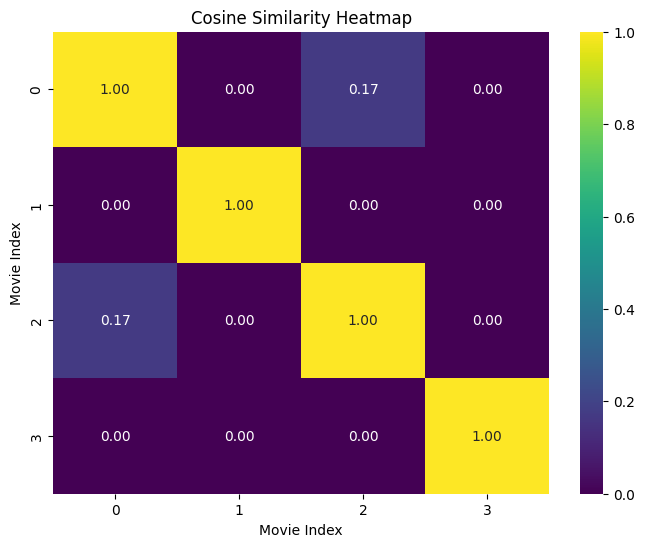

In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O
import matplotlib.pyplot as plt  # data visualization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns  # for heatmap visualization

# Sample movie dataset
data = {'Title': ['Movie 1', 'Movie 2', 'Movie 3', 'Movie 4'],
        'Genre': ['Action', 'Comedy', 'Action', 'Drama'],
        'Description': ['Explosive action-packed movie', 'Hilarious comedy with great actors',
                        'Action thriller with suspense', 'Emotional drama with a powerful story']}
movies_df = pd.DataFrame(data)

# Check for missing values and data types
print(movies_df.info())
print(movies_df.isnull().sum())

# Create an 'id' column for the sake of consistency with the original code
movies_df['id'] = movies_df.index  # Create an ID column from the index

# Rename the 'Title' column to 'title' and 'Description' to 'overview'
movies_df = movies_df.rename(columns={'Title': 'title', 'Description': 'overview'})

# Add a placeholder 'tagline' column
movies_df['tagline'] = ''  # Adding an empty 'tagline' column as placeholder

# Combine 'overview' and 'tagline' to create a 'content' feature
movies_df['content'] = movies_df['overview'] + ' ' + movies_df['tagline']

# Initialize CountVectorizer with n-grams
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))

# Fit and transform the 'content' column
count_matrix = count_vectorizer.fit_transform(movies_df['content'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

def get_movie_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    if title not in movies_df['title'].values:
        raise ValueError("Movie not found in the dataset")

    idx = movies_df[movies_df['title'] == title].index[0]

    # Get pairwise similarity scores of all movies with the given movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top 3 most similar movies (adjusted for small dataset)
    movie_indices = [i[0] for i in sim_scores[1:4]]  # Only 3 recommendations due to small dataset

    # Return the top 3 most similar movies
    return movies_df['title'].iloc[movie_indices]

# Test the recommendation function
print(get_movie_recommendations('Movie 1'))

# Plot the similarity matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim, cmap='viridis', cbar=True, annot=True, fmt='.2f')
plt.title('Cosine Similarity Heatmap')
plt.xlabel('Movie Index')
plt.ylabel('Movie Index')
plt.show()


